In [48]:
#Датасет содержит данные о среднем ежедневном времени, которое дети проводят перед экраном.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#загрузка данных
path = 'screen_time.csv'
data = pd.read_csv (path)

#проверка на пропущенные значения
print ('Пропущенные значения до обработки:')
print (data.isnull().sum())

#заполнение пропущенных значений (числовые заполняем средним значением, категориальные - модой)
for col in data:
  data[col] = data[col].fillna(data[col].mean() if data[col].dtype in ['int64', 'float64'] else data[col].mode()[0])

#кодируем категориальные признаки
label_encoders = {}
categorical_cols = ['Gender', 'Screen Time Type', 'Day Type']
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

#разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop('Average Screen Time (hours)', axis=1)
y = data['Average Screen Time (hours)'].astype(int)

#разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=42)

#инициализируем модели
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
ext_reg = ExtraTreesRegressor (n_estimators=100, random_state=42)
rf_reg = RandomForestRegressor (n_estimators=100, random_state=42)
br_reg = BayesianRidge()
kn_reg = KNeighborsRegressor(n_neighbors=5)
elastic_reg = ElasticNet(random_state=42,alpha=0.5, max_iter=1000,l1_ratio=0.5)

#обучение модели
gb_reg.fit(X_train, y_train)
ext_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
br_reg.fit(X_train, y_train)
kn_reg.fit(X_train, y_train)
elastic_reg.fit(X_train, y_train)


Пропущенные значения до обработки:
Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64


ElasticNet(alpha=0.5, random_state=42)


Gradient Boosting:
MAE: 0.39
MSE: 0.22
R2: 0.95


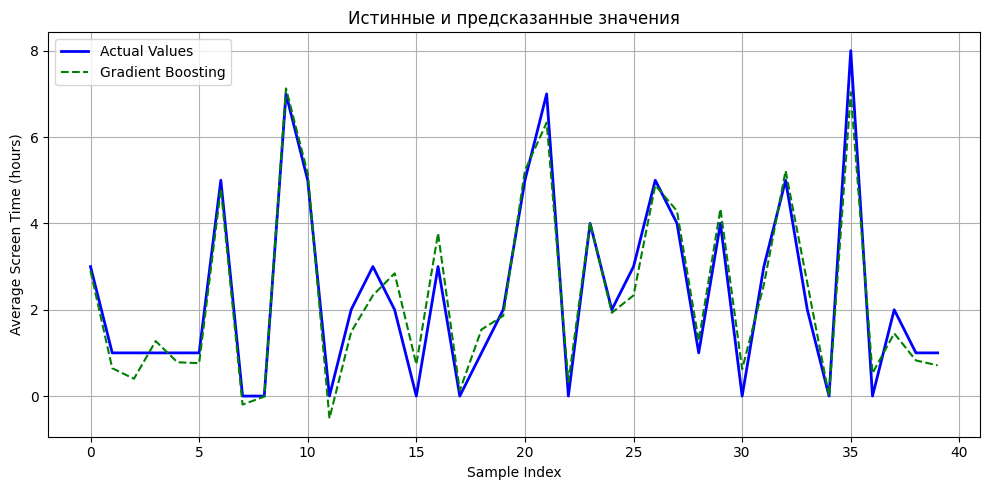

In [53]:
#прогнозирование и вычисление метрик
#Gradient Boosting
y_pred_gb = gb_reg.predict(X_test)

print(f'\nGradient Boosting:')
print(f'MAE: {mean_absolute_error(y_test,y_pred_gb):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_gb):.2f}')
print(f'R2: {r2_score(y_test, y_pred_gb):.2f}')

# Визуализация
plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred_gb[:n_show], 'g--', label='Gradient Boosting', linewidth=1.5)
plt.title('Истинные и предсказанные значения')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



ExtraTreesRegressor:
MAE: 0.34
MSE: 0.31
R2: 0.93


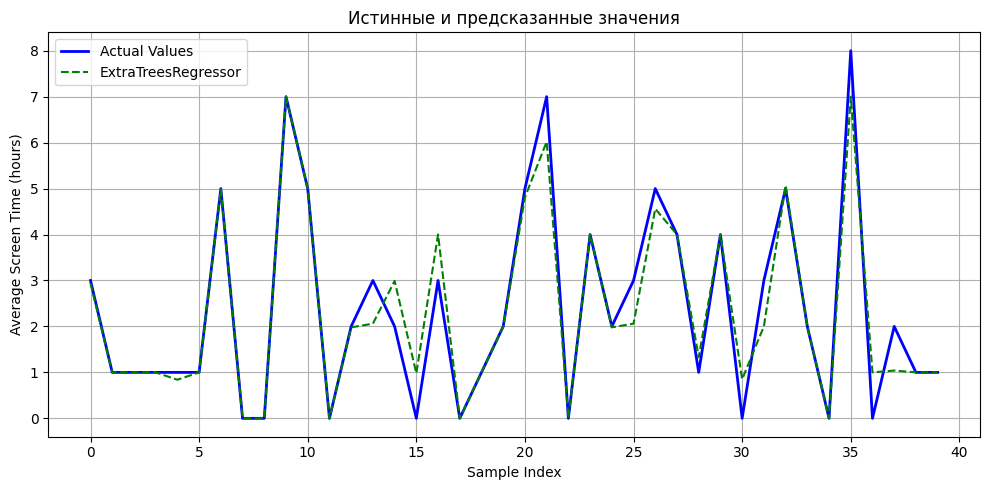

In [54]:
#прогнозирование и вычисление метрик
#ExtraTreesRegressor
y_pred_ext = ext_reg.predict(X_test)

print(f'\nExtraTreesRegressor:')
print(f'MAE: {mean_absolute_error(y_test,y_pred_ext):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_ext):.2f}')
print(f'R2: {r2_score(y_test, y_pred_ext):.2f}')

plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred_ext[:n_show], 'g--', label='ExtraTreesRegressor', linewidth=1.5)
plt.title('Истинные и предсказанные значения')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

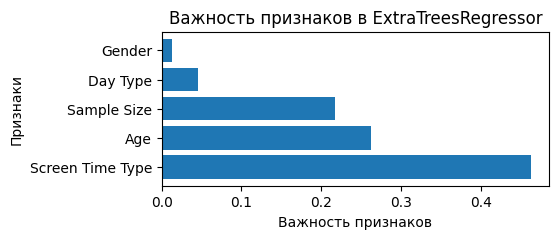

In [35]:
#важность признаков
feature_importance = ext_reg.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#график важности признаков
plt.figure(figsize=(5, 2))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в ExtraTreesRegressor')
plt.show()


RandomForestRegressorr:
MAE: 0.35
MSE: 0.26
R2: 0.94


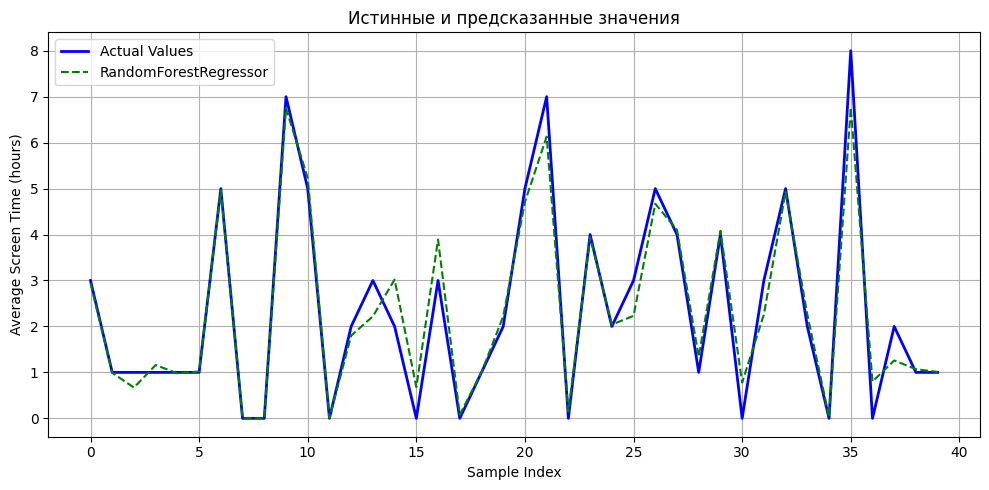

In [55]:
#прогнозирование и вычисление метрик
#RandomForestRegressor
y_pred_rf = rf_reg.predict(X_test)

print(f'\nRandomForestRegressorr:')
print(f'MAE: {mean_absolute_error(y_test,y_pred_rf):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf):.2f}')
print(f'R2: {r2_score(y_test, y_pred_rf):.2f}')

plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred_rf[:n_show], 'g--', label='RandomForestRegressor', linewidth=1.5)
plt.title('Истинные и предсказанные значения')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


BayesianRidge:
MAE: 0.62
MSE: 0.57
R2: 0.88


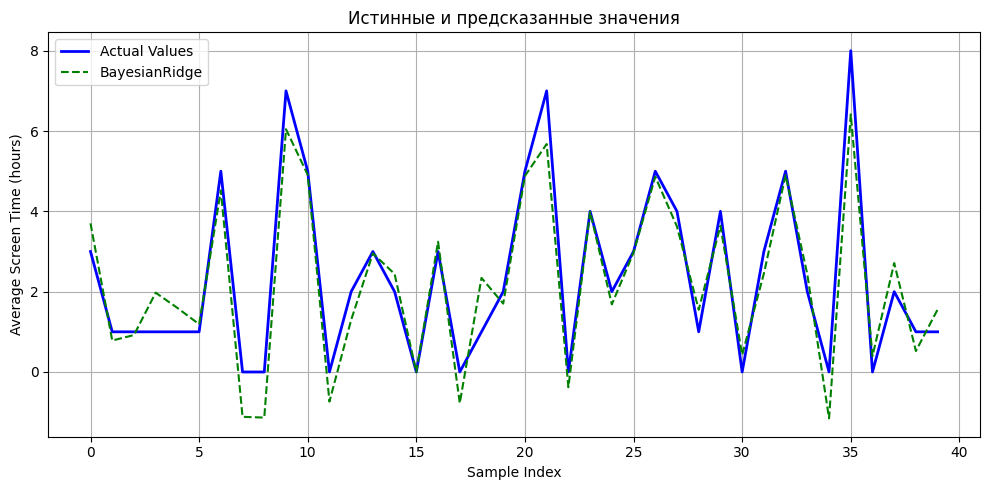

In [56]:
#прогнозирование и вычисление метрик
#BayesianRidge
y_pred_br = br_reg.predict(X_test)

print(f'\nBayesianRidge:')
print(f'MAE: {mean_absolute_error(y_test,y_pred_br):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_br):.2f}')
print(f'R2: {r2_score(y_test, y_pred_br):.2f}')

plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred_br[:n_show], 'g--', label='BayesianRidge', linewidth=1.5)
plt.title('Истинные и предсказанные значения')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KNeighborsRegressor:
MAE: 1.01
MSE: 1.58
R2: 0.67


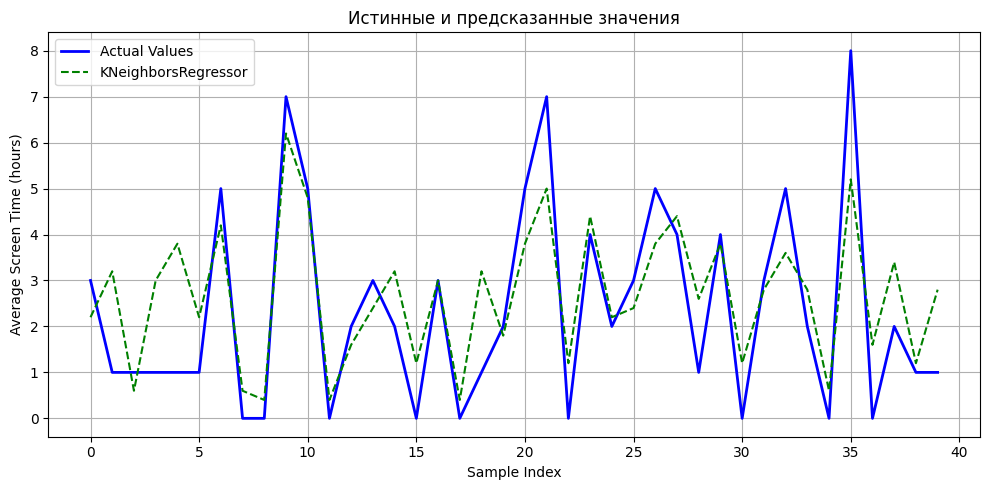

In [57]:
#прогнозирование и вычисление метрик
#KNeighborsRegressor
y_pred_kn = kn_reg.predict(X_test)

print(f'\nKNeighborsRegressor:')
print(f'MAE: {mean_absolute_error(y_test,y_pred_kn):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_kn):.2f}')
print(f'R2: {r2_score(y_test, y_pred_kn):.2f}')

plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred_kn[:n_show], 'g--', label='KNeighborsRegressor', linewidth=1.5)
plt.title('Истинные и предсказанные значения')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ElasticNet:
MAE: 0.84
MSE: 1.22
R2: 0.74


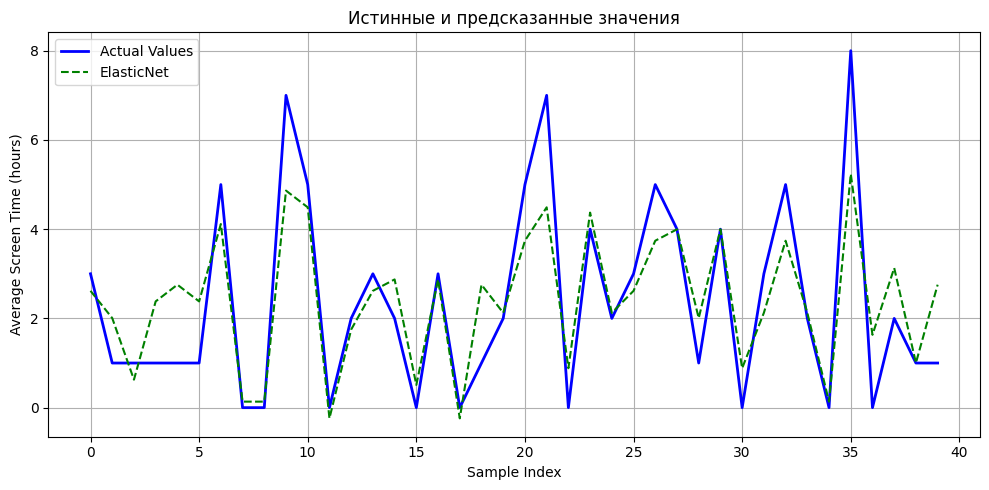

In [58]:
#прогнозирование и вычисление метрик
#ElasticNet
y_pred_elastic = elastic_reg.predict(X_test)

print(f'\nElasticNet:')
print(f'MAE: {mean_absolute_error(y_test,y_pred_elastic):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_elastic):.2f}')
print(f'R2: {r2_score(y_test, y_pred_elastic):.2f}')

plt.figure(figsize=(10, 5))
n_show=40
x_axis=range(n_show)
plt.plot(x_axis, y_test.values[:n_show], 'b-', label='Actual Values', linewidth=2)
plt.plot(x_axis, y_pred_elastic[:n_show], 'g--', label='ElasticNet', linewidth=1.5)
plt.title('Истинные и предсказанные значения')
plt.xlabel('Sample Index')
plt.ylabel('Average Screen Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()